## Example of generating a equilibrium from CHEASE equilibrium ##

We suggest you use the EPFL version of CHEASE. https://gitlab.epfl.ch/spc/chease

- You need to run CHEASE with ```NIDEAL=9``` (Output for GK codes such as ORB5, GENE, and GYSELA)
- You need to ensure the output COCOS number is 2
- You need to ensure the poloidal grid is equidistant and the total number of points is even

After running CHEASE, please locate ```ogyropsi.dat``` and initialise ```CHEASEMagnetConfig``` with it.

The example folder contains ```ogyropsi.zip```. This case is generated by using the example input ```50555t63.95``` in the ```WK``` directory of ```CHEASE``` EPFL repository. You may wish to unzip it to get ```ogyropsi.dat``` for the example to run.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gysmc import CHEASEMagnetConfig
from gysmc import GYSMagnetConfig

### Read the CHEASE output file and set up the coordinates ###
One will need to decide

- The ```psi``` value of the computational boundary and the corresponding radial coordinate ```rmax``` for it (should be the same as GYSELA ```rmax```).

It is suggested that we try to back up from the X point. This can be done by adjusting ```psinorm_max```.

In [ ]:
cheasemc = CHEASEMagnetConfig('ogyropsi.dat', psinorm_max=0.90, rmax=1.1)

Initialising CHEASEMagnetConfig from : /home/zhisong/chease/WK/50555t63/ogyropsi.dat
INFO: cocos = 2/12, (R,Z,phi), (r,theta,phi)
INFO: Computational boundary at r=1.1000: s_max=0.9487, psinorm_max=0.9000
INFO: Plasma boundary at r=1.0: s(r=1.0)=0.8624, psinorm(r=1.0)=0.7438
INFO: Geometry in original unit: R_geo = 2.9409, a_geo(at r=1) = 0.7595, Aspect ratio = 3.8719
INFO: Magnetic field in original unit: Bvac_geocentre = 1.0650, B_axis = 1.0566
INFO: Psi1: in original unit psi1 = 0.5364, normalised to Bvac0*a_geo^2 psi1_norm = 0.8730
INFO: B is normalised to Bvac0=1.0650 at Rgeo=2.9409, length to a_geo=0.7595


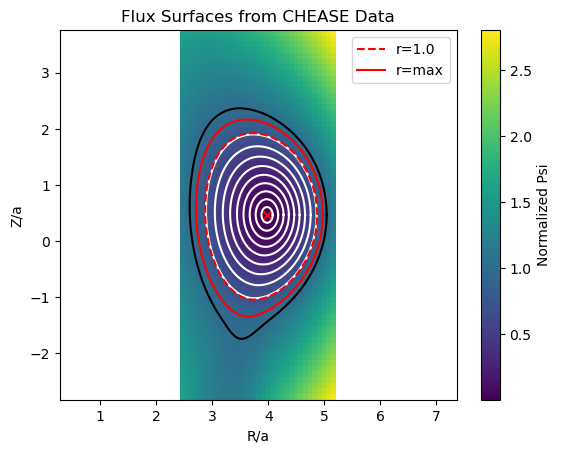

In [3]:
cheasemc.plot_flux_surfaces(normalised_units=True)

### Run some test to ensure the results are correct ###
- Compare gij and that from finite difference estimation from R,Z(r, theta)
- Compare Contravariant components of current (prescribed by flux functions in GS) and that computed from curl B

As seen, the current does not match very well. This shows that we need to increase the grid resolution for solving the GS equation and for generate the ```ogyropsi.dat``` file. It doesn't mean the conversion utility is wrong.

INFO: Testing gij comparison with finite difference


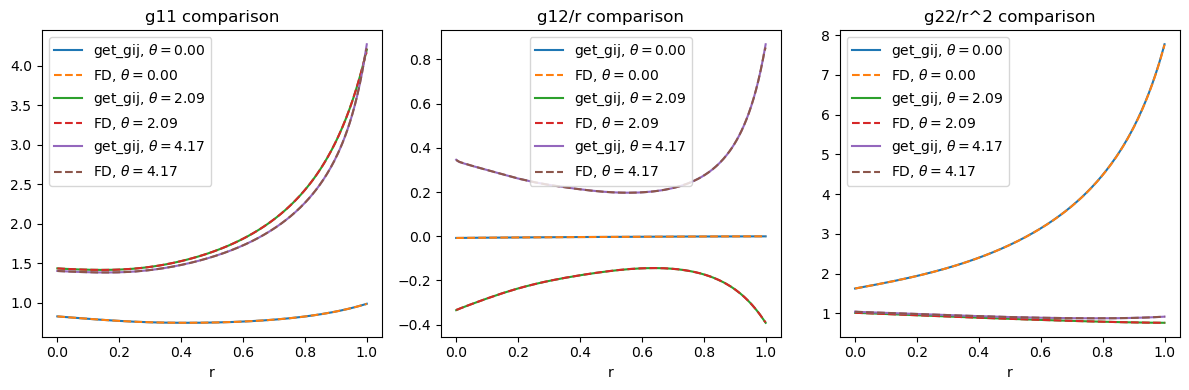

In [4]:
cheasemc.test_gij2D()

INFO: Testing current comparison with finite difference


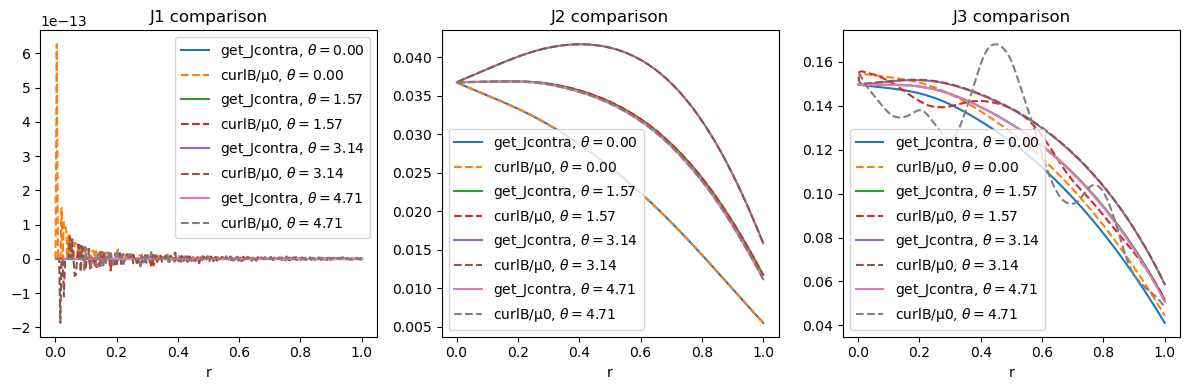

In [5]:
cheasemc.test_current2D()

### Write to GYSELA magnet_config.h5 ###
```Nr```, ```Ntheta```, ```minor_radius```, ```rmin```, ```rmax```, ```skiphole``` should match that of a GYSELA input file 

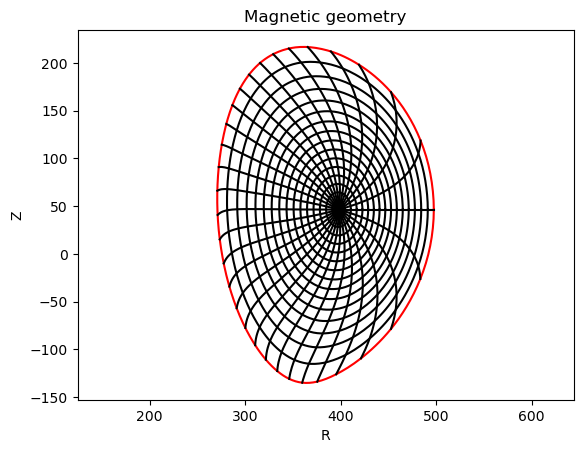

In [8]:
augconfig = GYSMagnetConfig(cheasemc, Nr=127, Ntheta=256, minor_radius=100, rmax=1.1, rmin=0.0, skiphole=True)
augconfig.plot_geometry()
augconfig.to_hdf5('chease_theta256.h5')

### How to use the generated hdf5 ###

- Copy it to ```gysela``` folder under ```wk/profiles```.

- Set ```magnet_strategy = "EXTERNAL"``` in your ```EQUIL``` namelist.

- Specify the path to the hdf5 file such as ```magnet_config_filename = profiles/magnet_config.h5``` in the ```Variables for radial profile input files``` section.